# Data Exploration

1.	Where should we deploy a food access program?
2.	How many people will be included? How many might be successfully engaged?
3.	Which subgroup of the population might benefit the most from the program?
4.	What is the projected impact of this program? 


In [2]:
import sqlite3
import pandas as pd

In [3]:
conn = sqlite3.connect('challenge.db')

In [ ]:
conn.close()

In [4]:
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", conn)
print(tables)

                  name
0  five_hundred_cities
1               access
2        variable_list


In [5]:
five_hundred_cities = pd.read_sql_query("SELECT * FROM five_hundred_cities", conn)

In [6]:
# we'll only keep the model based estimates for the analysis to make initial recommendations. 
# keeping only columns that are related to food access (using domain knowledge)
five_hundred_cities = five_hundred_cities[[
    'StateAbbr',          # State Abbreviation
    'PlaceName',          # City/Place Name
    'PlaceFIPS',          # Place FIPS Code
    'TractFIPS',          # Census Tract FIPS Code
    'Place_TractID',      # Place and Tract ID Combined
    'Population2010',     # Population Count from 2010 Census
    'ACCESS2_CrudePrev',  # Crude Prevalence of Current Lack of Health Insurance Access
    'ARTHRITIS_CrudePrev',# Crude Prevalence of Arthritis
    'BPHIGH_CrudePrev',   # Crude Prevalence of High Blood Pressure
    'BPMED_CrudePrev',    # Crude Prevalence of Blood Pressure Medication Use
    'CANCER_CrudePrev',   # Crude Prevalence of Cancer (excluding skin cancer)
    'CASTHMA_CrudePrev',  # Crude Prevalence of Current Asthma
    'CHD_CrudePrev',      # Crude Prevalence of Coronary Heart Disease
    'COPD_CrudePrev',     # Crude Prevalence of COPD (Chronic Obstructive Pulmonary Disease)
    'COREM_CrudePrev',    # Crude prevalence of older adult men aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening
    'COREW_CrudePrev',    # Crude prevalence of older adult women aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening
    'DIABETES_CrudePrev', # Crude Prevalence of Diabetes
    'HIGHCHOL_CrudePrev', # Crude Prevalence of High Cholesterol
    'KIDNEY_CrudePrev',   # Crude Prevalence of Chronic Kidney Disease
    'LPA_CrudePrev',      # Crude Prevalence of No Leisure-time Physical Activity
    'MHLTH_CrudePrev',    # Crude Prevalence of Poor Mental Health
    'OBESITY_CrudePrev',  # Crude Prevalence of Obesity
    'PHLTH_CrudePrev',    # Crude Prevalence of Poor Physical Health
    'STROKE_CrudePrev',   # Crude Prevalence of Stroke
    'TEETHLOST_CrudePrev',# Crude Prevalence of All Teeth Lost (aged ≥65 years)
    'Geolocation'         # Geographic Location Coordinates
]]

In [7]:
five_hundred_cities['TractFIPS'] = five_hundred_cities['TractFIPS'].astype(str).str.zfill(11)

# # extract first 5 digits for SS + CCC
five_hundred_cities['FIPS'] = five_hundred_cities['TractFIPS'].str[:5]

# convert back to int
five_hundred_cities['FIPS'] = five_hundred_cities['FIPS'].astype(int)

In [8]:
access_df = pd.read_sql_query("select * from access", conn)

In [9]:
access_df.columns

Index(['index', 'FIPS', 'State', 'County', 'LACCESS_POP10', 'LACCESS_POP15',
       'PCH_LACCESS_POP_10_15', 'PCT_LACCESS_POP10', 'PCT_LACCESS_POP15',
       'LACCESS_LOWI10', 'LACCESS_LOWI15', 'PCH_LACCESS_LOWI_10_15',
       'PCT_LACCESS_LOWI10', 'PCT_LACCESS_LOWI15', 'LACCESS_HHNV10',
       'LACCESS_HHNV15', 'PCH_LACCESS_HHNV_10_15', 'PCT_LACCESS_HHNV10',
       'PCT_LACCESS_HHNV15', 'LACCESS_SNAP15', 'PCT_LACCESS_SNAP15',
       'LACCESS_CHILD10', 'LACCESS_CHILD15', 'LACCESS_CHILD_10_15',
       'PCT_LACCESS_CHILD10', 'PCT_LACCESS_CHILD15', 'LACCESS_SENIORS10',
       'LACCESS_SENIORS15', 'PCH_LACCESS_SENIORS_10_15',
       'PCT_LACCESS_SENIORS10', 'PCT_LACCESS_SENIORS15', 'LACCESS_WHITE15',
       'PCT_LACCESS_WHITE15', 'LACCESS_BLACK15', 'PCT_LACCESS_BLACK15',
       'LACCESS_HISP15', 'PCT_LACCESS_HISP15', 'LACCESS_NHASIAN15',
       'PCT_LACCESS_NHASIAN15', 'LACCESS_NHNA15', 'PCT_LACCESS_NHNA15',
       'LACCESS_NHPI15', 'PCT_LACCESS_NHPI15', 'LACCESS_MULTIR15',
       'PCT_LAC

In [10]:
#  for FIPS that are not 5 digits, we will need to pad with leading 0s
# convert FIPS to string and pad with leading 0s
access_df['FIPS'] = access_df['FIPS'].astype(str)
access_df['FIPS'] = access_df['FIPS'].str.zfill(5)
access_df['FIPS'] = access_df['FIPS'].astype(int)

In [11]:
# use the most recent data
# remove columns taht aren't related to seniors, low income, or households with no car

access_df = access_df[[
'FIPS',                     
'State',                    
'County',                    
'LACCESS_SENIORS15',         # Count of seniors with low access to store
'PCT_LACCESS_SENIORS15',     # Percentage of seniors with low access to store
'LACCESS_HHNV15',           # Count of households with no car and low access to store
'PCT_LACCESS_HHNV15',       # Percentage of households with no car and low access to store
'LACCESS_LOWI15',           # Count of low income population with low access to store
'PCT_LACCESS_LOWI15',       # Percentage of low income population with low access to store
'LACCESS_POP15',            # Count of population with low access to store
'PCT_LACCESS_POP15',        # Percentage of population with low access to store
'LACCESS_WHITE15',          # Count of White population with low access to store
'PCT_LACCESS_WHITE15',      # Percentage of White population with low access to store
'LACCESS_BLACK15',          # Count of Black population with low access to store
'PCT_LACCESS_BLACK15',      # Percentage of Black population with low access to store
'LACCESS_HISP15',           # Count of Hispanic ethnicity population with low access to store
'PCT_LACCESS_HISP15',       # Percentage of Hispanic ethnicity population with low access to store
'LACCESS_NHASIAN15',        # Count of Asian population with low access to store
'PCT_LACCESS_NHASIAN15',    # Percentage of Asian population with low access to store
'LACCESS_NHNA15',           # Count of American Indian or Alaska Native population with low access to store
'PCT_LACCESS_NHNA15',       # Percentage of American Indian or Alaska Native population with low access to store
'LACCESS_NHPI15',           # Count of Hawaiian or Pacific Islander population with low access to store
'PCT_LACCESS_NHPI15',       # Percentage of Hawaiian or Pacific Islander population with low access to store
'LACCESS_MULTIR15',         # Count of Multiracial population with low access to store
'PCT_LACCESS_MULTIR15'      # Percentage of Multiracial population with low access to store
]]


In [12]:
# join the two dataframes on FIPS
merged_df = pd.merge(five_hundred_cities, access_df, on='FIPS', how='left')

In [13]:
# check if there are any missing values
merged_df.isnull().sum().sort_values(ascending=False)

COREW_CrudePrev          109
COREM_CrudePrev          103
TEETHLOST_CrudePrev       60
PCT_LACCESS_MULTIR15      38
PCT_LACCESS_SENIORS15     38
LACCESS_HHNV15            38
PCT_LACCESS_HHNV15        38
LACCESS_LOWI15            38
PCT_LACCESS_LOWI15        38
LACCESS_POP15             38
PCT_LACCESS_POP15         38
LACCESS_WHITE15           38
PCT_LACCESS_WHITE15       38
LACCESS_BLACK15           38
PCT_LACCESS_BLACK15       38
LACCESS_HISP15            38
PCT_LACCESS_HISP15        38
LACCESS_NHASIAN15         38
PCT_LACCESS_NHASIAN15     38
LACCESS_NHNA15            38
PCT_LACCESS_NHNA15        38
LACCESS_NHPI15            38
PCT_LACCESS_NHPI15        38
LACCESS_MULTIR15          38
LACCESS_SENIORS15         38
ACCESS2_CrudePrev          1
County                     0
StateAbbr                  0
State                      0
CHD_CrudePrev              0
PlaceFIPS                  0
TractFIPS                  0
Place_TractID              0
Population2010             0
ARTHRITIS_Crud

In [14]:
# select numerical columns

numerical_cols = merged_df.select_dtypes(include=['number']).columns
numerical_cols

columns_to_drop = ['PlaceFIPS', 'FIPS'] # filter out categorical columns
filtered_numerical_cols = numerical_cols.drop(['PlaceFIPS', 'FIPS'])


In [15]:
print(merged_df[filtered_numerical_cols].corr())

                       Population2010  ACCESS2_CrudePrev  ARTHRITIS_CrudePrev  \
Population2010               1.000000           0.049058            -0.208813   
ACCESS2_CrudePrev            0.049058           1.000000             0.015160   
ARTHRITIS_CrudePrev         -0.208813           0.015160             1.000000   
BPHIGH_CrudePrev            -0.195947           0.320869             0.859888   
BPMED_CrudePrev             -0.150218          -0.033556             0.828140   
CANCER_CrudePrev            -0.122140          -0.382636             0.715015   
CASTHMA_CrudePrev           -0.151463           0.225258             0.480158   
CHD_CrudePrev               -0.185568           0.335850             0.877556   
COPD_CrudePrev              -0.190817           0.380779             0.806639   
COREM_CrudePrev              0.019579          -0.672686            -0.056999   
COREW_CrudePrev              0.025905          -0.697447            -0.160655   
DIABETES_CrudePrev          

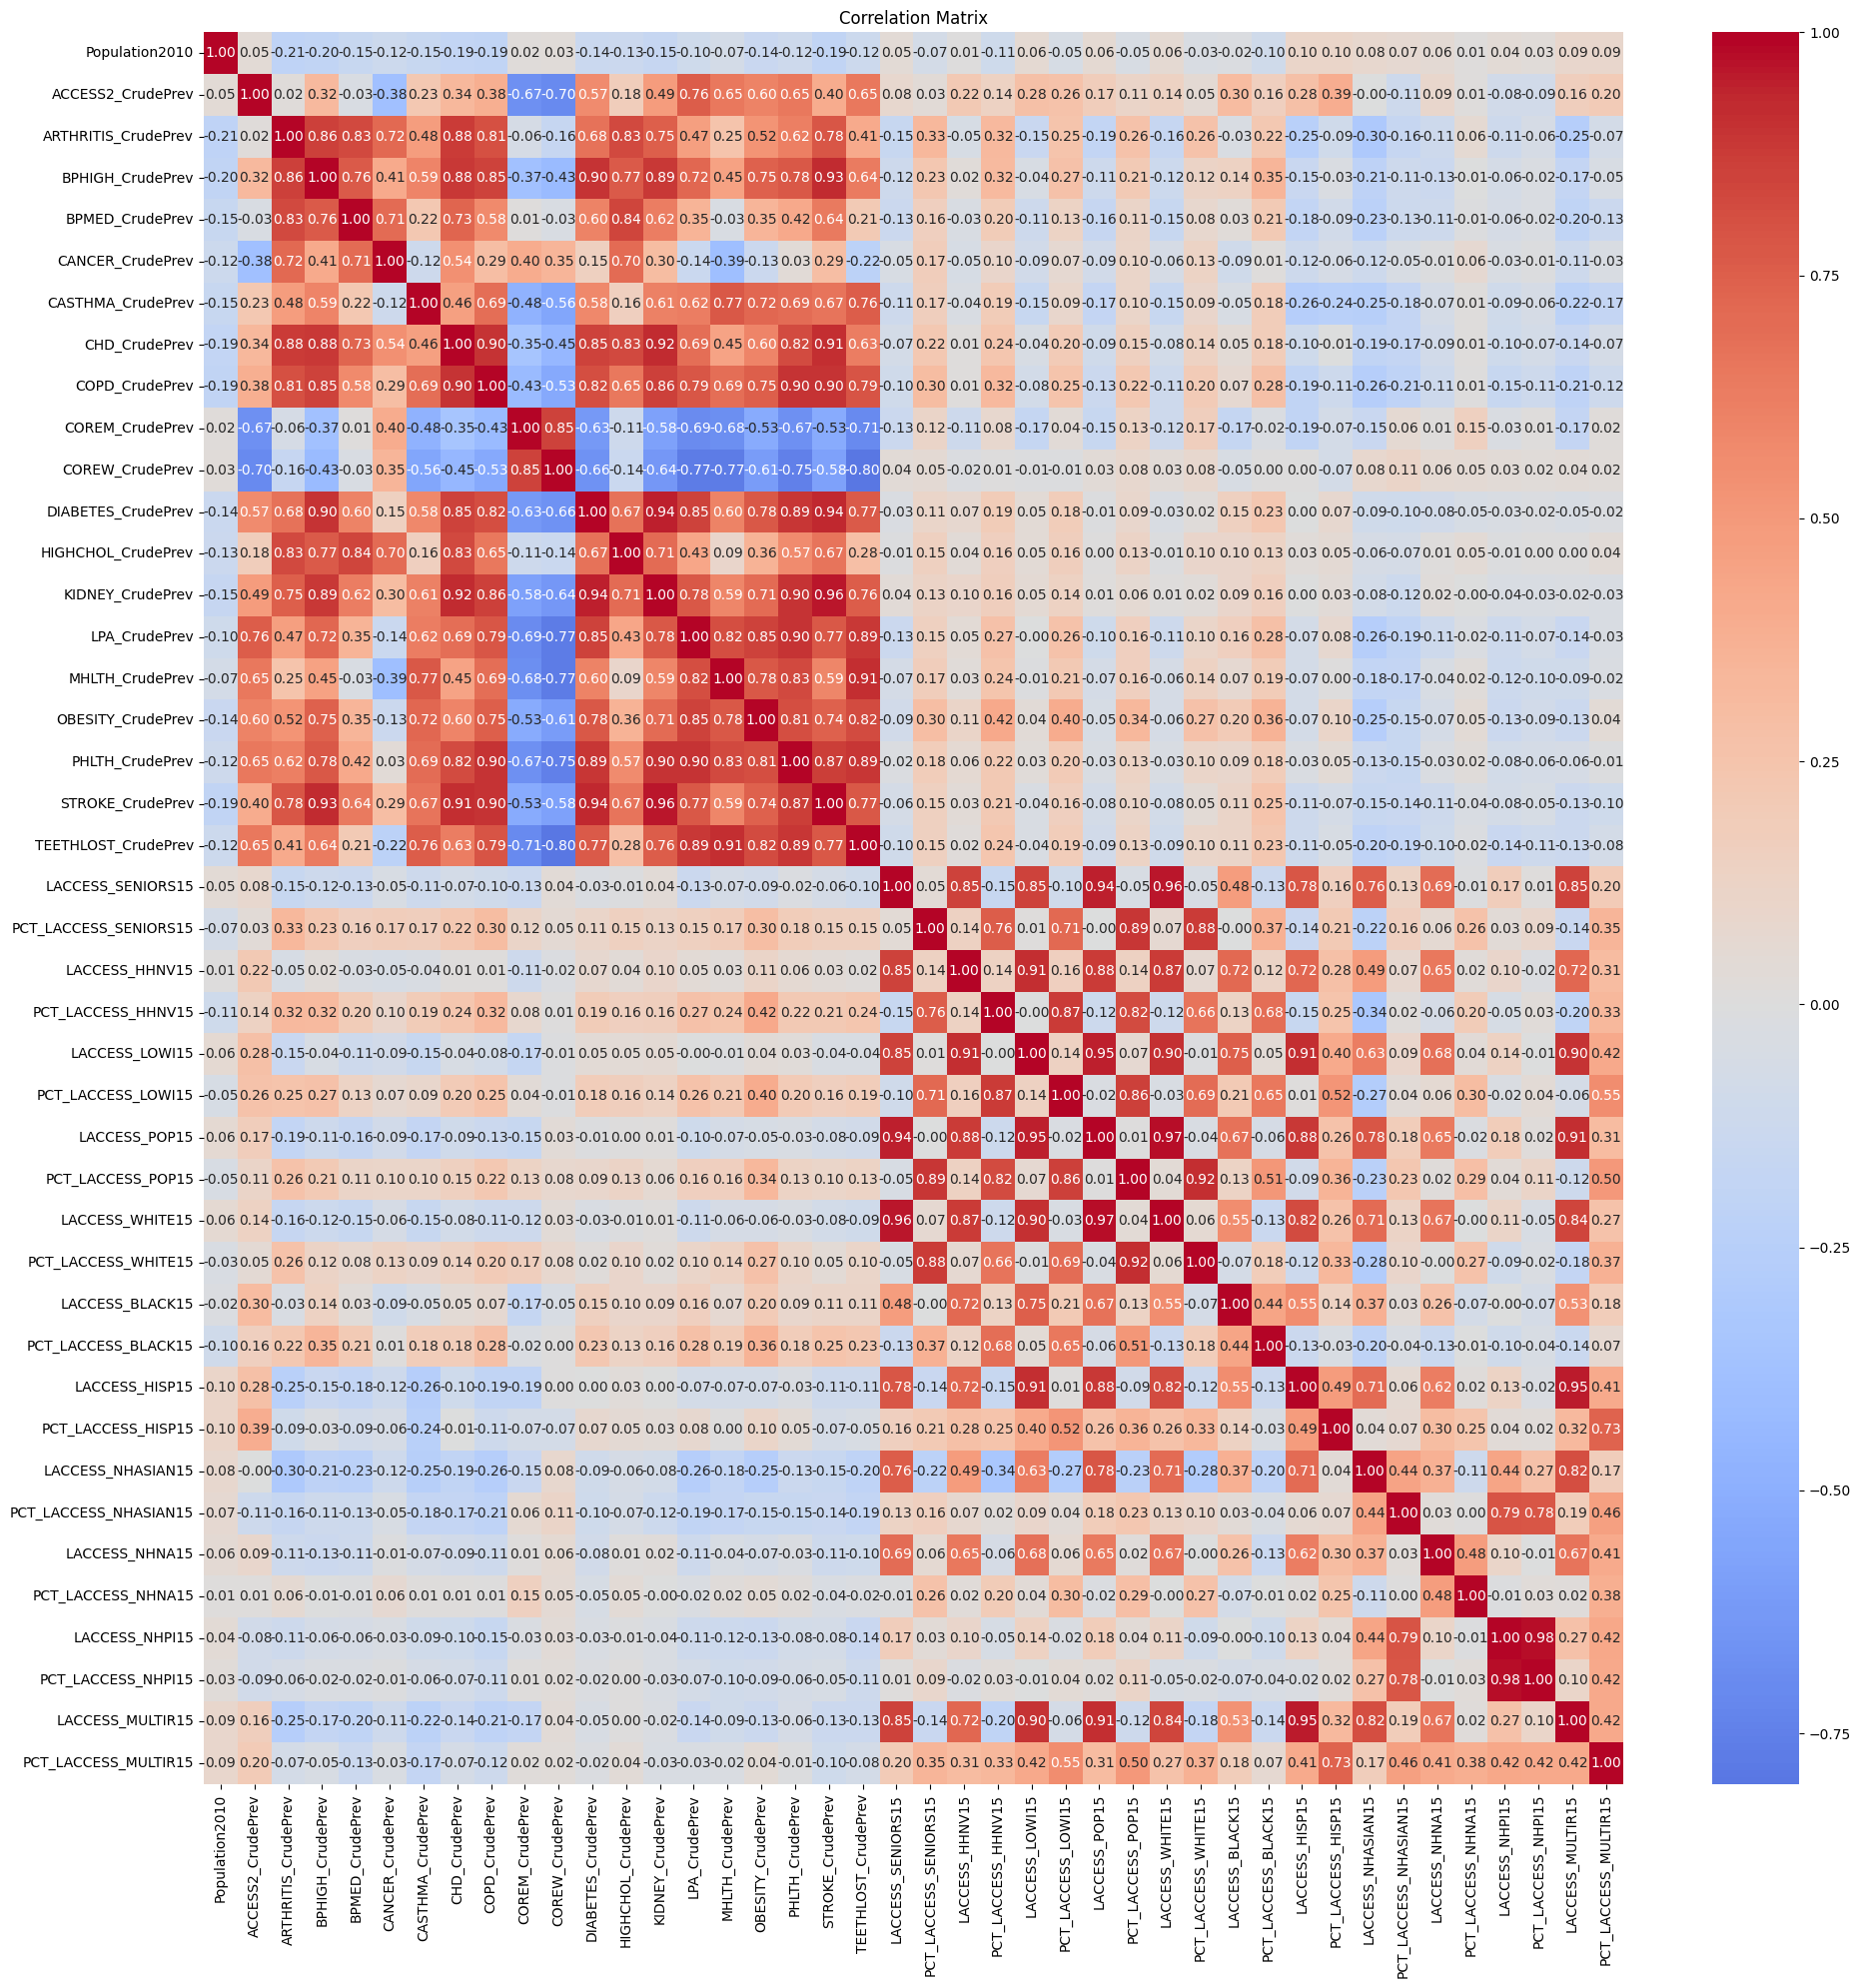

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate correlation matrix
corr_matrix_numerical = merged_df[filtered_numerical_cols].corr()

# Display the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix_numerical, 
            annot=True,  # Show correlation values
            cmap='coolwarm',  # Color scheme
            center=0,  # Center the colormap at 0
            fmt='.2f')  # Round to 2 decimal places
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

### five hundred cities

- population size plays no role in health outcomes (perhaps because all of these are 'cities'?)
- Lack of health insurance (18-64): could be larger symptom of not having the awareness to get health insurance (even those whoare are 65+)
    - positive correlaiton with multiple chronic diseases
- lots of comorbidity (except for cancer)
- negative correlation between 65+ who are up-to-date with regular preventative screenings and other chronic conditions 

### food access
- all the counts are positively correlated to one another, and all the percentages are also positively correlated to one another 
    - likely that seniors that are low income + have no car will have low access to food stores
- let's just focus on the senior rate since that's are main focus
    - however knowing that seniors and lack of car are highly correlated – this informs us to create policies that can accommodate that (meal delivery vs grocery store vouchers)

#### food access specific to race
- high positive correlation between low access count in seniors and low access count amongst white,  hispanic, asian, and american indian/ alaskan native, and multiracial (except Hawaiian or Pacific Islander)
    - black is 0.48
- similar trend with the percentage, but hispanic, black, asian percentages have weaker correlation with senior percentage


### overall
- We see a few weak positive correlation between health indicators (like arithitis, high BP, COPD, and Obesity) and low access to grocery store amongst seniors, low-income, have no car and overall population wide low access.  
    - we know that unhealthy diet is one of the major causes for high BP
    - Obesity creates higher risk for high BP 
    - Age and weight increase risk for arthritis 
    - COPD – isn't caused by lack of a nutritious diet, but the condition makes it difficult for people to access grocery stores regularly


In [17]:
# access_columns_to_keep = [
#     # Access and Proximity
#     'LACCESS_SENIORS15', 'PCT_LACCESS_SENIORS15',
#     'LACCESS_HHNV15', 'PCT_LACCESS_HHNV15',
#     'LACCESS_LOWI15', 'PCT_LACCESS_LOWI15',
#     'LACCESS_POP15', 'PCT_LACCESS_POP15',
    
#     # Store Availability
#     'SNAPS17', 'SNAPSPTH17',
#     'CONVS16', 'CONVSPTH16',
#     'SUPERC16', 'SUPERCPTH16',
#     'GROC16', 'GROCPTH16',
    
#     # Restaurant & Food
#     'FFR16', 'PC_FFRSALES12', 'FFRPTH16',
#     'REDEMP_SNAPS17', 'PCT_SNAP17',
#     'FDPIR12', 'FDPIR15',
#     'FOOD_BANKS18',
    
#     # Food Security
#     'FOODINSEC_15_17', 'VLFOODSEC_15_17',
    
#     # Food Tax
#     'FOOD_TAX14',
    
#     # Local Foods
#     'DIRSALES_FARMS12', 'PC_DIRSALES12',
#     'FMRKT18', 'FMRKTPTH18',
#     'FMRKT_SNAP18', 'PCT_FMRKT_SFMNP18',
#     'PCT_FMRKT_FRVEG18', 'PCT_FMRKT_ANMLPROD18',
    
#     # Health & Demographics
#     'PCT_DIABETES_ADULTS13',
#     'PCT_OBESE_ADULTS17',
#     'PCT_65OLDER10',
#     'MEDHHINC15'
# ]

# access_merged_merged_df_filtered = access_df[access_columns_to_keep]

In [18]:
merged_merged_df = pd.read_sql_query("select * from variable_list", conn)

we might this variable to estimate participation rate:
- Indicator: SNAP participants (percent pop)*


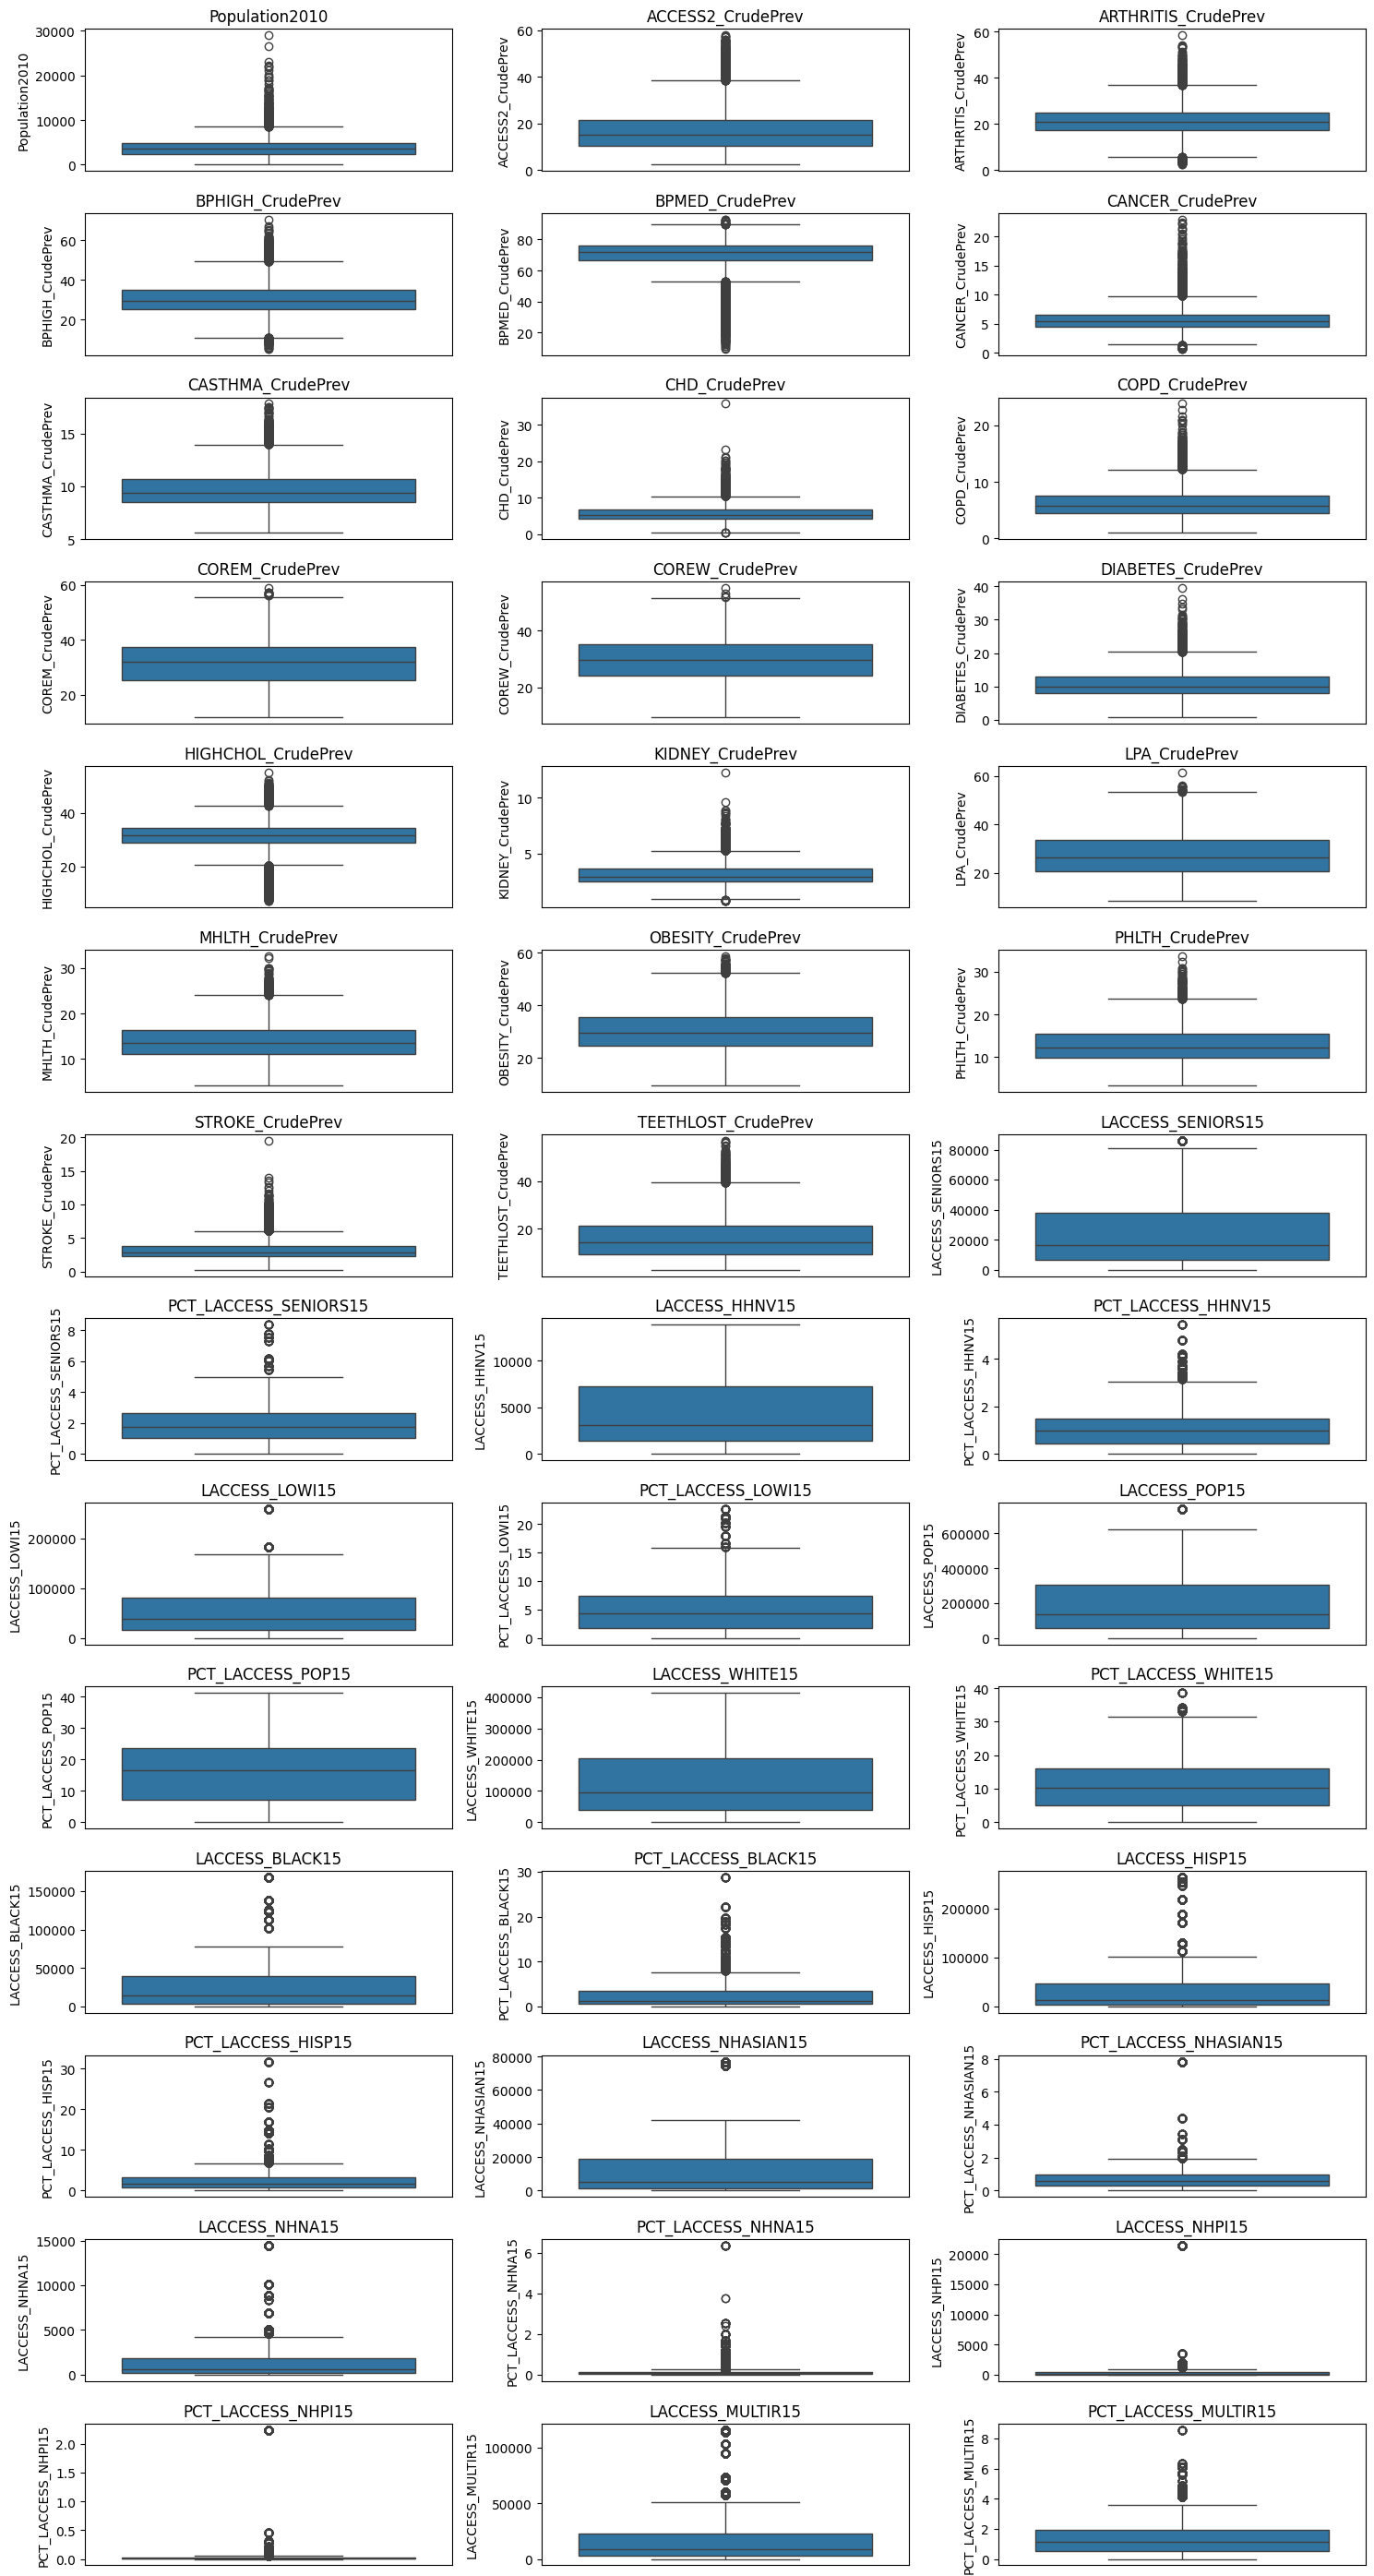

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


def create_boxplot(df, columns, figsize=(15,30)):
    n_rows = len(columns) * 3
    
    plt.figure(figsize=figsize)
    
    for i, column in enumerate(columns, 1):
        plt.subplot(len(columns)//3 + 1, 3, i)
        sns.boxplot(y=df[column])
        plt.title(column)
        plt.xticks([])
        
    plt.tight_layout()
    plt.show()

create_boxplot(merged_df, filtered_numerical_cols)


- We see outliers for the percentages of low access to grocery stores amongst seniors, people who don't own cars, and in general.

In [23]:
def create_histograms(df, columns, figsize=(15, 50)):
    # Create subplots with specific number of rows and columns
    fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=figsize)
    
    # Create histogram for each column
    for i, column in enumerate(columns):
        sns.histplot(data=df[column], ax=axes[i])
        axes[i].set_title(f'Histogram of {column}')
    
    plt.tight_layout()
    plt.show()

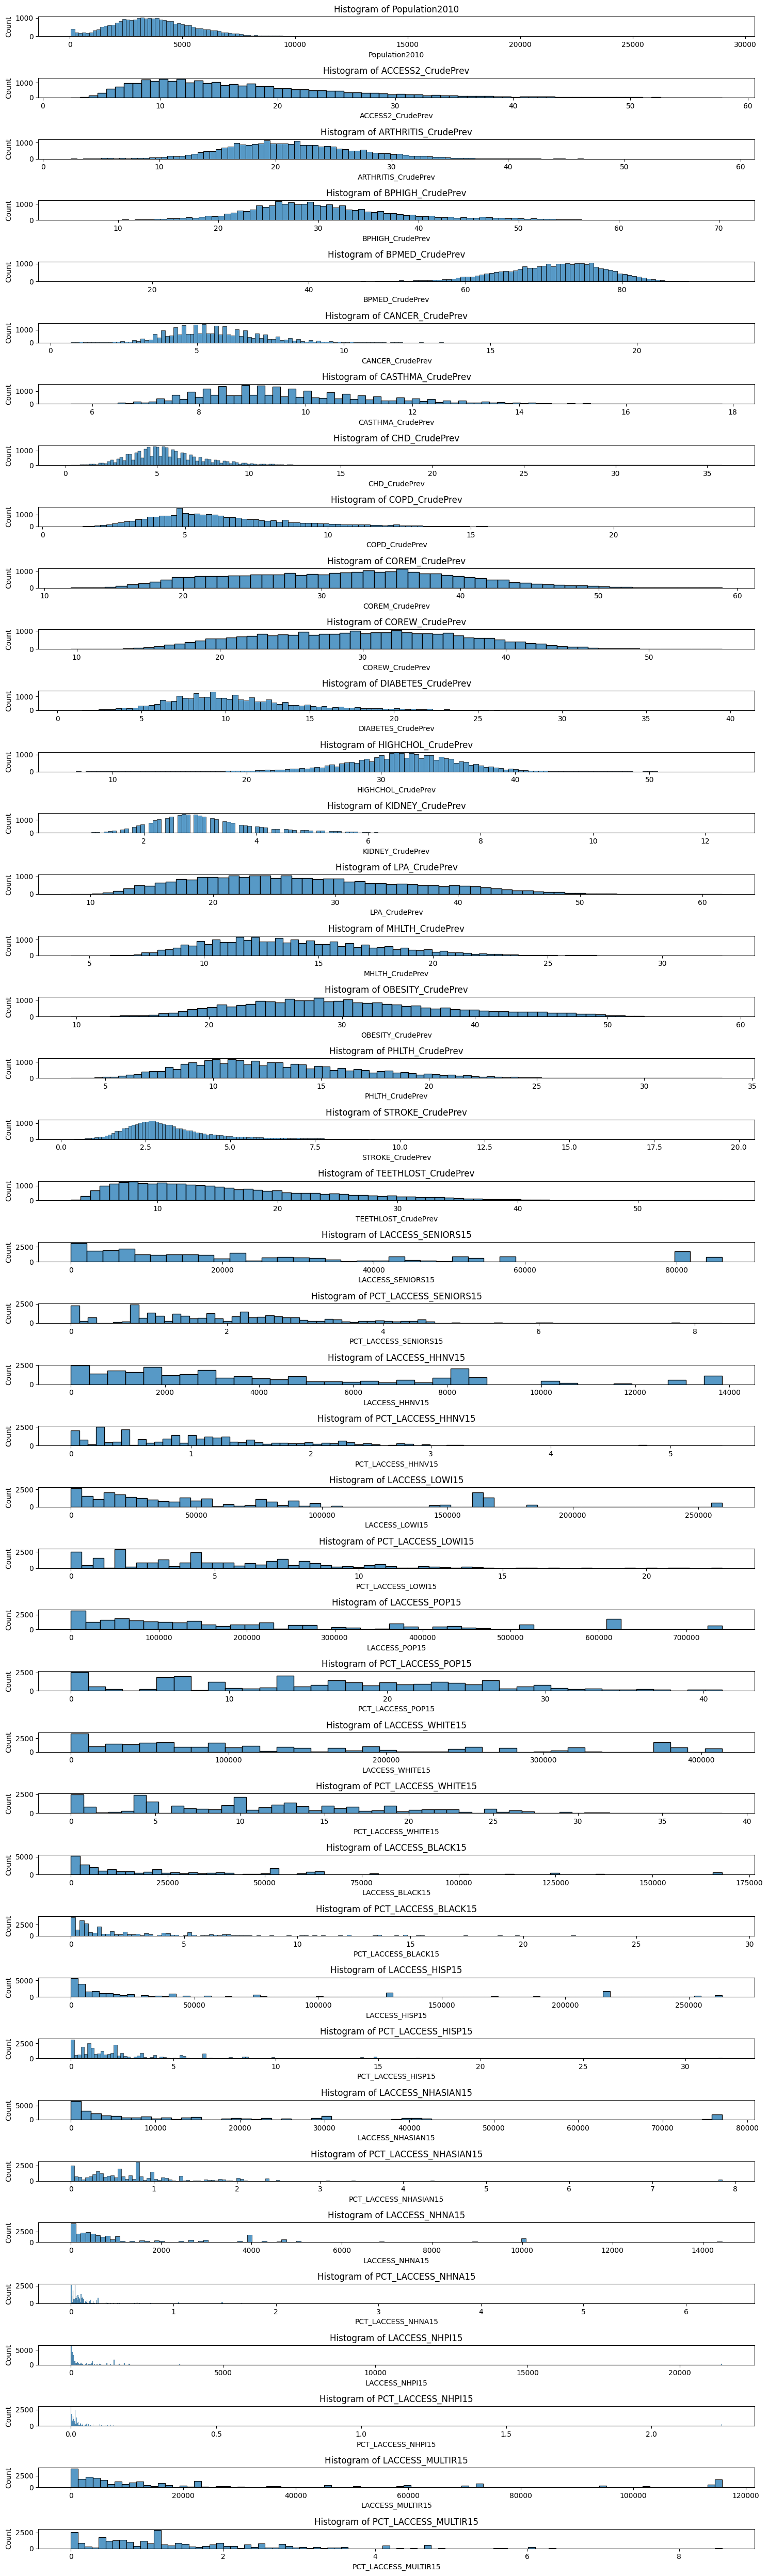

In [24]:
create_histograms(merged_df, filtered_numerical_cols)

# Data Cleaing

### impute missing values in access_df based on median of state
- using median because it's less sensitive to outliers
- would use distance if I had more time, but would need to pull external data source to get centroids/boundaries
- does pose some limitation because counties from two different states can border one another, so we're missing important data points for imputation

In [25]:
# Alexandria, VA has null values for PCT_LACCESS_SENIORS15 and other access columns

merged_df[merged_df['PCT_LACCESS_SENIORS15'].isna()]

,StateAbbr,PlaceName,PlaceFIPS,TractFIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,...,LACCESS_HISP15,PCT_LACCESS_HISP15,LACCESS_NHASIAN15,PCT_LACCESS_NHASIAN15,LACCESS_NHNA15,PCT_LACCESS_NHNA15,LACCESS_NHPI15,PCT_LACCESS_NHPI15,LACCESS_MULTIR15,PCT_LACCESS_MULTIR15
25773,VA,Alexandria,5101000,51510200102,5101000-51510200102,4429,20.8,17.8,25.7,66.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25774,VA,Alexandria,5101000,51510200103,5101000-51510200103,7151,19.1,19.6,28.9,68.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25775,VA,Alexandria,5101000,51510200104,5101000-51510200104,3963,23.8,15.1,23.9,59.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25776,VA,Alexandria,5101000,51510200105,5101000-51510200105,3777,15.2,19.5,30.5,69.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25777,VA,Alexandria,5101000,51510200106,5101000-51510200106,3176,14.5,25.5,31.6,77.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25778,VA,Alexandria,5101000,51510200107,5101000-51510200107,5766,9.9,13.2,18.1,59.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25779,VA,Alexandria,5101000,51510200201,5101000-51510200201,3571,9.1,16.9,21.4,67.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25780,VA,Alexandria,5101000,51510200202,5101000-51510200202,1572,5.5,26.3,30.5,79.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25781,VA,Alexandria,5101000,51510200301,5101000-51510200301,3103,13.2,14.9,21.2,63.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25782,VA,Alexandria,5101000,51510200302,5101000-51510200302,4222,15.3,21.1,28.4,71.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# check if there are any missing values
merged_df.isnull().sum().sort_values(ascending=False)

# only filling the ones related to food access – the other ones are not relevant to the analysis

COREW_CrudePrev          109
COREM_CrudePrev          103
TEETHLOST_CrudePrev       60
PCT_LACCESS_MULTIR15      38
PCT_LACCESS_SENIORS15     38
LACCESS_HHNV15            38
PCT_LACCESS_HHNV15        38
LACCESS_LOWI15            38
PCT_LACCESS_LOWI15        38
LACCESS_POP15             38
PCT_LACCESS_POP15         38
LACCESS_WHITE15           38
PCT_LACCESS_WHITE15       38
LACCESS_BLACK15           38
PCT_LACCESS_BLACK15       38
LACCESS_HISP15            38
PCT_LACCESS_HISP15        38
LACCESS_NHASIAN15         38
PCT_LACCESS_NHASIAN15     38
LACCESS_NHNA15            38
PCT_LACCESS_NHNA15        38
LACCESS_NHPI15            38
PCT_LACCESS_NHPI15        38
LACCESS_MULTIR15          38
LACCESS_SENIORS15         38
ACCESS2_CrudePrev          1
County                     0
StateAbbr                  0
State                      0
CHD_CrudePrev              0
PlaceFIPS                  0
TractFIPS                  0
Place_TractID              0
Population2010             0
ARTHRITIS_Crud

In [27]:
# Access columns from 2015
columns_to_impute = ['LACCESS_SENIORS15',         # Count of seniors with low access to store
'PCT_LACCESS_SENIORS15',     # Percentage of seniors with low access to store
'LACCESS_HHNV15',           # Count of households with no car and low access to store
'PCT_LACCESS_HHNV15',       # Percentage of households with no car and low access to store
'LACCESS_LOWI15',           # Count of low income population with low access to store
'PCT_LACCESS_LOWI15',       # Percentage of low income population with low access to store
'LACCESS_POP15',            # Count of population with low access to store
'PCT_LACCESS_POP15',        # Percentage of population with low access to store
'LACCESS_WHITE15',          # Count of White population with low access to store
'PCT_LACCESS_WHITE15',      # Percentage of White population with low access to store
'LACCESS_BLACK15',          # Count of Black population with low access to store
'PCT_LACCESS_BLACK15',      # Percentage of Black population with low access to store
'LACCESS_HISP15',           # Count of Hispanic ethnicity population with low access to store
'PCT_LACCESS_HISP15',       # Percentage of Hispanic ethnicity population with low access to store
'LACCESS_NHASIAN15',        # Count of Asian population with low access to store
'PCT_LACCESS_NHASIAN15',    # Percentage of Asian population with low access to store
'LACCESS_NHNA15',           # Count of American Indian or Alaska Native population with low access to store
'PCT_LACCESS_NHNA15',       # Percentage of American Indian or Alaska Native population with low access to store
'LACCESS_NHPI15',           # Count of Hawaiian or Pacific Islander population with low access to store
'PCT_LACCESS_NHPI15',       # Percentage of Hawaiian or Pacific Islander population with low access to store
'LACCESS_MULTIR15',         # Count of Multiracial population with low access to store
'PCT_LACCESS_MULTIR15'     # Percentage of Multiracial population with low access to store
]

merged_df[columns_to_impute] = merged_df[columns_to_impute].fillna(merged_df.groupby('State')[columns_to_impute].transform('median'))


In [28]:
five_hundred_cities.describe()

,PlaceFIPS,Population2010,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CANCER_CrudePrev,CASTHMA_CrudePrev,CHD_CrudePrev,COPD_CrudePrev,...,DIABETES_CrudePrev,HIGHCHOL_CrudePrev,KIDNEY_CrudePrev,LPA_CrudePrev,MHLTH_CrudePrev,OBESITY_CrudePrev,PHLTH_CrudePrev,STROKE_CrudePrev,TEETHLOST_CrudePrev,FIPS
count,2.721000e+04,27210.000000,27209.000000,27210.000000,27210.000000,27210.000000,27210.000000,27210.000000,27210.000000,27210.000000,...,27210.000000,27210.000000,27210.000000,27210.000000,27210.000000,27210.000000,27210.000000,27210.000000,27150.000000,27210.000000
mean,2.605539e+06,3785.703087,16.990915,21.430129,30.653208,70.744274,5.648912,9.741352,5.602977,6.309960,...,10.811062,31.364296,3.099666,27.593671,13.921040,30.472922,12.882962,3.211466,16.108107,25862.715913
std,1.681206e+06,1944.825182,8.869361,5.995361,8.260472,7.927116,1.803257,1.710538,2.118858,2.545739,...,4.269441,4.887047,0.960904,8.830258,3.617324,8.180685,4.011045,1.449541,8.780165,16717.533247
min,1.500300e+04,50.000000,2.400000,2.400000,5.300000,9.600000,0.700000,5.600000,0.300000,1.000000,...,0.800000,6.900000,0.700000,8.400000,4.200000,9.600000,3.400000,0.300000,2.800000,1073.000000
25%,6.815540e+05,2457.250000,10.300000,17.300000,25.300000,66.700000,4.500000,8.500000,4.200000,4.500000,...,7.900000,28.800000,2.500000,20.700000,11.200000,24.500000,9.900000,2.300000,9.200000,8001.000000
50%,2.622000e+06,3611.000000,15.000000,21.000000,29.500000,71.700000,5.500000,9.400000,5.300000,5.800000,...,10.000000,31.700000,2.900000,26.500000,13.500000,29.500000,12.300000,2.900000,14.100000,26077.000000
75%,4.052500e+06,4900.000000,21.600000,25.100000,34.900000,75.900000,6.600000,10.700000,6.700000,7.600000,...,12.900000,34.400000,3.600000,33.800000,16.400000,35.600000,15.400000,3.800000,21.300000,40109.000000
max,5.613900e+06,28960.000000,57.800000,58.400000,70.300000,92.800000,22.900000,17.800000,35.800000,23.800000,...,39.500000,55.400000,12.300000,61.600000,32.600000,58.600000,33.600000,19.500000,57.000000,56021.000000


In [29]:
# assuming that these counties have really great food access for seniors (but would need more investigation if time permits)

access_df[access_df['LACCESS_SENIORS15'] == 0]

,FIPS,State,County,LACCESS_SENIORS15,PCT_LACCESS_SENIORS15,LACCESS_HHNV15,PCT_LACCESS_HHNV15,LACCESS_LOWI15,PCT_LACCESS_LOWI15,LACCESS_POP15,...,LACCESS_HISP15,PCT_LACCESS_HISP15,LACCESS_NHASIAN15,PCT_LACCESS_NHASIAN15,LACCESS_NHNA15,PCT_LACCESS_NHNA15,LACCESS_NHPI15,PCT_LACCESS_NHPI15,LACCESS_MULTIR15,PCT_LACCESS_MULTIR15
268,8047,CO,Gilpin,0.0,0.0,134.721886,5.476499,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
548,15005,HI,Kalawao,0.0,0.0,12.000000,17.391304,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
770,18147,IN,Spencer,0.0,0.0,174.690660,2.161478,0.368442,0.001759,2.095516,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1045,21105,KY,Hickman,0.0,0.0,98.782416,4.870928,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1471,28141,MS,Tishomingo,0.0,0.0,315.842936,3.876325,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1858,36061,NY,New York,0.0,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,2.0,0.000126,0.0,0.0,0.0,0.0,0.0,0.0
2456,47057,TN,Grainger,0.0,0.0,336.494079,3.726814,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2735,48425,TX,Somervell,0.0,0.0,25.656078,0.833531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2858,51079,VA,Greene,0.0,0.0,270.489045,3.989514,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2876,51115,VA,Mathews,0.0,0.0,129.500712,3.356680,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


<Figure size 1000x600 with 0 Axes>

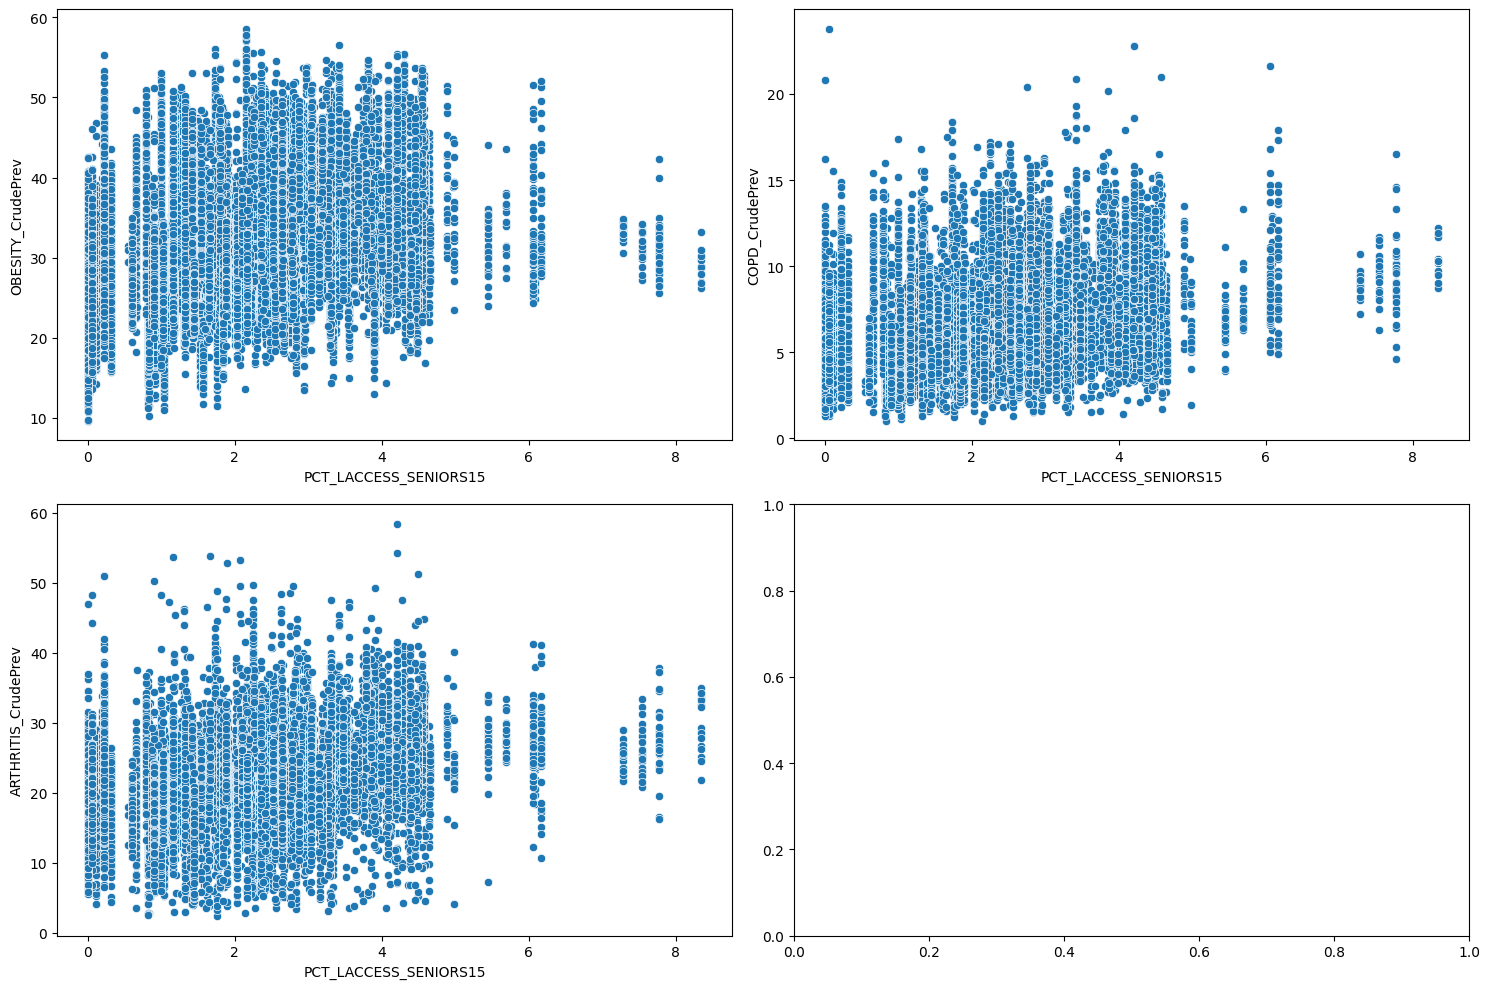

In [30]:
# Basic scatterplot
plt.figure(figsize=(10,6))
# plt.scatter(merged_df['PCT_LACCESS_SENIORS15'], merged_df['OBESITY_CrudePrev'])
# plt.xlabel('Percent Seniors with Low Food Access')
# plt.ylabel('Adult obesity Rate')
# plt.title('Relationship between Senior Food Access and Obesity')

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Food Access vs OBESITY
sns.scatterplot(data=merged_df, 
                x='PCT_LACCESS_SENIORS15', 
                y='OBESITY_CrudePrev',
                ax=axes[0,0])

# Plot 2: Food Access vs COPD
sns.scatterplot(data=merged_df, 
                x='PCT_LACCESS_SENIORS15', 
                y='COPD_CrudePrev',
                ax=axes[0,1])

# Plot 3: Food Access vs Arthritis
sns.scatterplot(data=merged_df, 
                x='PCT_LACCESS_SENIORS15', 
                y='ARTHRITIS_CrudePrev',
                ax=axes[1,0])

plt.tight_layout()
plt.show()

# 1. Where should we deploy a food access program?

## create a composite score that quantifies health indicators

- include health indicators that are directly linked to food access and shows comorbidity

- Moderate positive correlation with low food access percentage amongst elderly
    - ARTHRITIS_CrudePrev (0.333)
    - COPD_CrudePrev (0.296)
    - BPHIGH_CrudePrev (High Blood Pressure) (0.228)
    - CHD_CrudePrev (Coronary Heart Disease) (0.220)

- Weak Positive Correlations (0.1-0.2):
    - CASTHMA_CrudePrev (Asthma) (0.167)
    - BPMED_CrudePrev (Blood Pressure Medication) (0.162)
    - CANCER_CrudePrev (0.172)

- Comorbidity: 
    - High Blood Pressure (BPHIGH):
        -  Diabetes (0.899)
        -  Coronary Heart Disease (0.881)
        - Stroke (0.929)
        -  Kidney Disease (0.885)
        -  COPD (0.852)
        -  Arthritis (0.859)
    - Coronary Heart Disease (CHD):
        -  COPD (0.900)
        -  Stroke (0.910)
        -  Kidney Disease (0.918)
        -  Arthritis (0.877)
    - Diabetes (DIABETES):
        -  Kidney Disease (0.944)
        -  Stroke (0.935)
        -  Physical Health Issues (0.894)
    - COPD:
        -  Stroke (0.901)
        -  Physical Health Issues (0.896)
        -  Kidney Disease (0.861)

In [31]:
from sklearn.preprocessing import StandardScaler

# Create list of health variables
health_vars = ['ARTHRITIS_CrudePrev', 'OBESITY_CrudePrev', 
               'BPHIGH_CrudePrev', 'CHD_CrudePrev']

# Standardize to z-scores
scaler = StandardScaler()
health_scaled = pd.DataFrame(scaler.fit_transform(merged_df[health_vars]), 
                        columns=health_vars, 
                        index=merged_df.index)

health_weights = {
    'ARTHRITIS_CrudePrev': 0.333, 
    'OBESITY_CrudePrev': 0.296, 
    'BPHIGH_CrudePrev': 0.228, 
    'CHD_CrudePrev': 0.220
}

merged_df['health_score'] = sum(health_scaled[var] * weight 
                        for var, weight in health_weights.items())


In [32]:
# didn't have enough time to implement comorbidity score

## create another composite score that quantifies grocery store accessibility

In [33]:
access_vars = ['PCT_LACCESS_LOWI15', 
               'PCT_LACCESS_HHNV15', 'PCT_LACCESS_SENIORS15']

scaler = StandardScaler()
access_scaled = pd.DataFrame(scaler.fit_transform(merged_df[access_vars]) * -1, 
                        columns=access_vars, 
                        index=merged_df.index)

access_weights = {
    'PCT_LACCESS_LOWI15': 0.25, 
    'PCT_LACCESS_HHNV15': 0.25, 
    'PCT_LACCESS_SENIORS15': 0.5
}

merged_df['access_score'] = sum(access_scaled[var] * weight for var, weight in access_weights.items())

# Create final composite score
merged_df['composite_score'] = (merged_df['health_score'] + merged_df['access_score']) / 2

In [34]:
merged_df['composite_score'].describe()

count    2.721000e+04
mean    -2.026392e-16
std      5.369326e-01
min     -2.537125e+00
25%     -3.374280e-01
50%     -7.638242e-03
75%      3.069506e-01
max      3.739656e+00
Name: composite_score, dtype: float64

Higher health scores indicate worse health conditions

Higher access scores indicate worse food access

Higher combined scores indicate areas with greatest need for intervention

In [35]:
import geopandas as gpd

gdf = gpd.read_file('tracts/500Cities_Tracts_Clip.shp')

In [36]:
gdf.head()

,place2010,tract2010,ST,PlaceName,plctract10,PlcTrPop10,geometry
0,0107000,01073000100,01,Birmingham,0107000-01073000100,3042,"POLYGON ((-9653001.056 3974630.899, -9652982.0..."
1,0107000,01073000300,01,Birmingham,0107000-01073000300,2735,"POLYGON ((-9657462.853 3968794.996, -9657470.2..."
2,0107000,01073000400,01,Birmingham,0107000-01073000400,3338,"POLYGON ((-9657275.613 3972217.16, -9657275.39..."
3,0107000,01073000500,01,Birmingham,0107000-01073000500,2864,"POLYGON ((-9660666.406 3968887.964, -9660631.7..."
4,0107000,01073000700,01,Birmingham,0107000-01073000700,2577,"POLYGON ((-9661391.097 3968591.429, -9661398.2..."


In [37]:
merged_df.head()

,StateAbbr,PlaceName,PlaceFIPS,TractFIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,...,PCT_LACCESS_NHASIAN15,LACCESS_NHNA15,PCT_LACCESS_NHNA15,LACCESS_NHPI15,PCT_LACCESS_NHPI15,LACCESS_MULTIR15,PCT_LACCESS_MULTIR15,health_score,access_score,composite_score
0,AL,Birmingham,107000,01073000100,0107000-01073000100,3042,24.4,31.2,47.7,77.8,...,0.274585,476.945542,0.072433,80.060491,0.012159,6376.995723,0.968462,1.817597,-1.790462,0.013567
1,AL,Birmingham,107000,01073000300,0107000-01073000300,2735,30.4,30.5,48.2,78.5,...,0.274585,476.945542,0.072433,80.060491,0.012159,6376.995723,0.968462,1.926239,-1.790462,0.067888
2,AL,Birmingham,107000,01073000400,0107000-01073000400,3338,24.7,31.5,49.1,79.4,...,0.274585,476.945542,0.072433,80.060491,0.012159,6376.995723,0.968462,1.816425,-1.790462,0.012981
3,AL,Birmingham,107000,01073000500,0107000-01073000500,2864,25.2,35.0,54.1,82.1,...,0.274585,476.945542,0.072433,80.060491,0.012159,6376.995723,0.968462,2.450106,-1.790462,0.329822
4,AL,Birmingham,107000,01073000700,0107000-01073000700,2577,29.0,36.3,56.5,81.8,...,0.274585,476.945542,0.072433,80.060491,0.012159,6376.995723,0.968462,2.945516,-1.790462,0.577527


In [38]:
merged_gdf = gdf.merge(merged_df, left_on='tract2010', right_on='TractFIPS', how='left')

In [55]:
import ipywidgets as widgets
from ipywidgets import interact
import contextily as ctx
import matplotlib.pyplot as plt


states = gpd.read_file("ne_110m_admin_1_states_provinces/ne_110m_admin_1_states_provinces.shp")

In [66]:
us_albers = "+proj=aea +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs"
epsg_2163 = "EPSG:2163"

In [ ]:
# Filter for US states
states = states[states['iso_a2'] == 'US']

Index(['StateAbbr', 'PlaceName', 'PlaceFIPS', 'TractFIPS', 'Place_TractID',
       'Population2010', 'ACCESS2_CrudePrev', 'ARTHRITIS_CrudePrev',
       'BPHIGH_CrudePrev', 'BPMED_CrudePrev', 'CANCER_CrudePrev',
       'CASTHMA_CrudePrev', 'CHD_CrudePrev', 'COPD_CrudePrev',
       'COREM_CrudePrev', 'COREW_CrudePrev', 'DIABETES_CrudePrev',
       'HIGHCHOL_CrudePrev', 'KIDNEY_CrudePrev', 'LPA_CrudePrev',
       'MHLTH_CrudePrev', 'OBESITY_CrudePrev', 'PHLTH_CrudePrev',
       'STROKE_CrudePrev', 'TEETHLOST_CrudePrev', 'Geolocation', 'FIPS',
       'State', 'County', 'LACCESS_SENIORS15', 'PCT_LACCESS_SENIORS15',
       'LACCESS_HHNV15', 'PCT_LACCESS_HHNV15', 'LACCESS_LOWI15',
       'PCT_LACCESS_LOWI15', 'LACCESS_POP15', 'PCT_LACCESS_POP15',
       'LACCESS_WHITE15', 'PCT_LACCESS_WHITE15', 'LACCESS_BLACK15',
       'PCT_LACCESS_BLACK15', 'LACCESS_HISP15', 'PCT_LACCESS_HISP15',
       'LACCESS_NHASIAN15', 'PCT_LACCESS_NHASIAN15', 'LACCESS_NHNA15',
       'PCT_LACCESS_NHNA15', 'LACCESS_NHP

In [ ]:
def plot_coverage(percentile_threshold):

    crs = epsg_2163
    
    fig = plt.figure(figsize=(20,10))
    
    map_ax = plt.subplot2grid((1, 4), (0, 0), colspan=3)
    text_ax = plt.subplot2grid((1, 4), (0, 3))

    states_proj = states.to_crs(crs)
    
    states_proj.plot(ax=map_ax, color='none', edgecolor='gray', linewidth=0.5)
    
    score_threshold = merged_gdf['composite_score'].quantile(percentile_threshold/100)
    
    covered_tracts = merged_gdf[merged_gdf['composite_score'] >= score_threshold]
    
    # Calculate populations covered
    seniors_covered = covered_tracts['LACCESS_SENIORS15'].sum()
    cities_covered = covered_tracts['PlaceFIPS'].nunique()
    states_covered = covered_tracts['StateAbbr'].nunique()

    # Plot map
    gdf_proj = gdf.to_crs(crs)
    gdf_proj.plot(ax=map_ax, color='lightgrey')  

    covered_tracts_proj = covered_tracts.to_crs(crs)
    covered_tracts_proj.plot(ax=map_ax, color='red')  # Highlight priority tracts

    text_ax.text(0.1, 0.8, 'Coverage Statistics:', fontsize=12, fontweight='bold')
    text_ax.text(0.1, 0.7, f'Coverage at {percentile_threshold}th Percentile and above', fontsize=10)
    text_ax.text(0.1, 0.6, f'Tracts Covered: {len(covered_tracts):,}', fontsize=10)
    text_ax.text(0.1, 0.5, f'Cities Covered: {cities_covered:,.0f}', fontsize=10)
    text_ax.text(0.1, 0.4, f'States Covered: {states_covered:,.0f}', fontsize=10)
    text_ax.text(0.1, 0.3, f'Seniors with Low Access Covered:\n{seniors_covered:,.0f}', fontsize=10)
    
    map_ax.axis('off')
    text_ax.axis('off')
    
# Create interactive slider
interact(plot_coverage,
        percentile_threshold=widgets.FloatSlider(
        min=0,
        max=100,
        step=5,
        value=50,
        description='Percentile Threshold'))

interactive(children=(FloatSlider(value=50.0, description='Percentile Threshold', step=5.0), Output()), _dom_c…

<function __main__.plot_coverage(percentile_threshold)>

In [89]:
coverage_stats = []


for p in range(0, 105, 5):
    # Get score threshold for this percentile
    score_threshold = merged_gdf['composite_score'].quantile(p/100)
    
    # Filter tracts meeting threshold
    covered_tracts = merged_gdf[merged_gdf['composite_score'] >= score_threshold]
    
    # Calculate statistics
    stats = {
        'Percentile': p,
        'Score_Threshold': score_threshold,
        'Tracts_Covered': len(covered_tracts),
        'Seniors_Covered': covered_tracts['LACCESS_SENIORS15'].sum(),
        'Cities_Covered': covered_tracts['PlaceFIPS'].nunique(),
        'States_Covered': covered_tracts['StateAbbr'].nunique()
    }
    
    coverage_stats.append(stats)

# Convert to DataFrame
coverage_df = pd.DataFrame(coverage_stats)
coverage_df['Seniors_Covered'] = coverage_df['Seniors_Covered'].apply(lambda x: '{:,.2f}'.format(x))

In [90]:
coverage_df

,Percentile,Score_Threshold,Tracts_Covered,Seniors_Covered,Cities_Covered,States_Covered
0,0,-2.54,28196,"716,699,610.62",500,51
1,5,-0.85,26786,"687,551,664.19",498,51
2,10,-0.65,25376,"651,500,733.57",495,51
3,15,-0.52,23966,"613,464,539.24",489,51
4,20,-0.42,22557,"574,134,573.45",482,50
5,25,-0.34,21147,"535,916,081.91",475,50
6,30,-0.26,19737,"498,027,811.93",468,50
7,35,-0.19,18327,"460,146,392.04",462,49
8,40,-0.13,16918,"421,619,628.40",452,49
9,45,-0.07,15508,"383,299,591.15",443,49


We want to prioritize areas that have a high composite score. Depending on the funding allocated, we can expand to more areas. 

We would want to test it out in a few selected areas of varying scores to see how effective the program is in improving selected health outcomes, since the correlation is moderately positive (not strongly).

- Our ultimate goal can be to target tracts that have a positive composite score which indicate these are areas of priority areas for intervention. This encompasses 417/500 cities. 

# 2.	How many people will be included? How many might be successfully engaged?

- We would include around 302,297,714 (302 million) people in our senior population that are currently struggling with low access to grocery stores. 

- According to [KFF](https://www.kff.org/medicare/issue-brief/medicare-advantage-in-2024-enrollment-update-and-key-trends/#:~:text=More%20than%20half%20(54%25),from%202%25%20to%2063%25), in 2024 54% of eligble Medicare beneficiaries are enrolled in Medicare Advantage. 
- If 54% of seniors struggling with food access get Medicare Advantage and use our plan, an optimistic and general upper limit estimate would yield us 302,297,714 * 0.54 = 163,240,765 participants.

We define successfully engaging as successfully signing a low-access senior up for the Medicare Advantage service (not that they would use the service since we don't have data on their behavioral changes yet).

# 3.	Which subgroup of the population might benefit the most from the program?

- cannot infer impact on ethnic groups within the senior population with the two provided datasets – we'll need the proportion of seniors within each ethnic group facing food insecurity 
- we do know that if we create a policy that's focused on meal delivery rather than grocery store vouchers, this would benefit the population of seniors that don't have access to a car. 

# 4.	What is the projected impact of this program? 

- Direct Impact
    number of seniors with low access covered 
    percentage of overall low coverage population
- Health Impact
    arthritis improvement
    COPD management
    high BP
    heart disease
- Coverage Statistics
    - Number of census tracts, cities, states covered

### Choropleth map by composite score